# In this notebook, we are conducting basical visual analysis
Files that we will be looking at include:  
../Data/academy_monthly_desktop_201501-202309.json  
../Data/academy_monthly_mobile_201501-202309.json  
../Data/academy_monthly_cumulative_201501-202309.json  

Time is in: YYYYMMDDHH format  

# Imports

In [80]:
import matplotlib.pyplot as plt
import json
import os
from datetime import datetime

# Get all data

In [7]:
#Get dictionary data from json files
data_desktop = open('../Data/academy_monthly_desktop_201501-202309.json')
data_desktop = json.load(data_desktop)

data_mobile = open('../Data/academy_monthly_mobile_201501-202309.json')
data_mobile = json.load(data_mobile)

data_cumulative = open('../Data/academy_monthly_cumulative_201501-202309.json')
data_cumulative = json.load(data_cumulative)

# Visualization 1: ...
Maximum Average and Minimum Average - The first graph should contain time series for the articles that have the highest average monthly page requests and the lowest average monthly page requests for desktop access and mobile access. Your graph should have four lines (max desktop, min desktop, max mobile, min mobile).

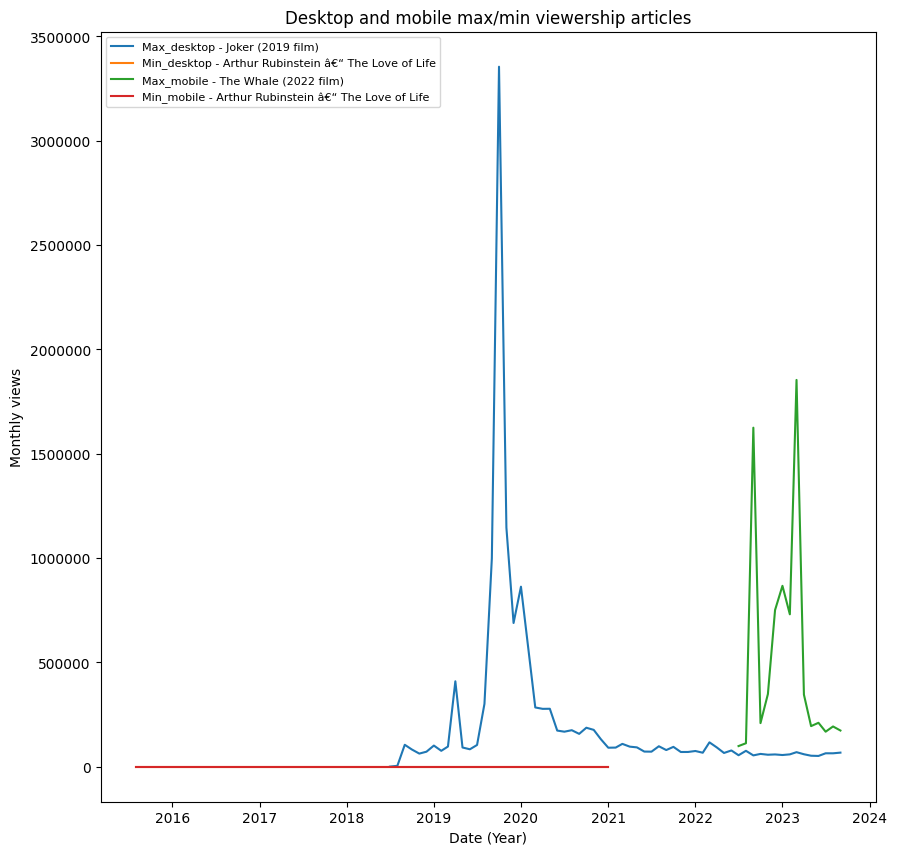

In [119]:
#Get highest and lowest desktop monthly average viewership
average_desktop_viewship = {}
for article in data_desktop:
    name = article[0]
    totalviewship = 0
    months = []
    values = []
    for x in article[1]["Views"]:
        months.append(x)
        values.append(article[1]["Views"][x])
        totalviewship += article[1]["Views"][x]
    averageviewship = totalviewship / len(article[1]["Views"])
    average_desktop_viewship[name] = {
        "averageviewship": averageviewship,
        "months": months,
        "values": values
    }

#Sort on averageviewship
average_desktop_viewship = sorted(average_desktop_viewship.items(), key=lambda x:x[1]['averageviewship'])
min_desktop = average_desktop_viewship[0]
max_desktop = average_desktop_viewship[len(average_desktop_viewship)-1]

#######################################################################################################
#######################################################################################################
#Get highest and lowest mobile monthly average viewership
average_mobile_viewship = {}
for article in data_mobile:
    name = article[0]
    totalviewship = 0
    months = []
    values = []
    for x in article[1]["Views"]:
        months.append(x)
        values.append(article[1]["Views"][x])
        totalviewship += article[1]["Views"][x]
    averageviewship = totalviewship / len(article[1]["Views"])
    average_mobile_viewship[name] = {
        "averageviewship": averageviewship,
        "months": months,
        "values": values
    }

#Sort on averageviewship
average_mobile_viewship = sorted(average_mobile_viewship.items(), key=lambda x:x[1]['averageviewship'])
min_mobile = average_mobile_viewship[0]
max_mobile = average_mobile_viewship[len(average_mobile_viewship)-1]

#######################################################################################################
#######################################################################################################
#Plot
fig, ax = plt.subplots(figsize=(10,10))
max_desktop_x = [datetime.strptime(d, '%Y%m%d%H') for d in max_desktop[1]['months']]
max_desktop_y = max_desktop[1]['values']
min_desktop_x = [datetime.strptime(d, '%Y%m%d%H') for d in min_desktop[1]['months']]
min_desktop_y = min_desktop[1]['values']
max_mobile_x = [datetime.strptime(d, '%Y%m%d%H') for d in max_mobile[1]['months']]
max_mobile_y = max_mobile[1]['values']
min_mobile_x = [datetime.strptime(d, '%Y%m%d%H') for d in min_mobile[1]['months']]
min_mobile_y = min_mobile[1]['values']
ax.plot(max_desktop_x, max_desktop_y, label=f'Max_desktop - {max_desktop[0]}')
ax.plot(min_desktop_x, min_desktop_y, label=f'Min_desktop - {min_desktop[0]}')
ax.plot(max_mobile_x, max_mobile_y, label=f'Max_mobile - {max_mobile[0]}')
ax.plot(min_mobile_x, min_mobile_y, label=f'Min_mobile - {min_mobile[0]}')
plt.title('Desktop and mobile max/min viewership articles')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_xlabel('Date (Year)')
ax.set_ylabel('Monthly views')
ax.legend(loc=2,prop={'size': 8})
plt.savefig("../Results/MinMaxAverages.png")
plt.show()

# Visualization 2: ...
Top 10 Peak Page Views - The second graph should contain time series for the top 10 article pages by largest (peak) page views over the entire time by access type. You first find the month for each article that contains the highest (peak) page views, and then order the articles by these peak values. Your graph should contain the top 10 for desktop and top 10 for mobile access (20 lines).

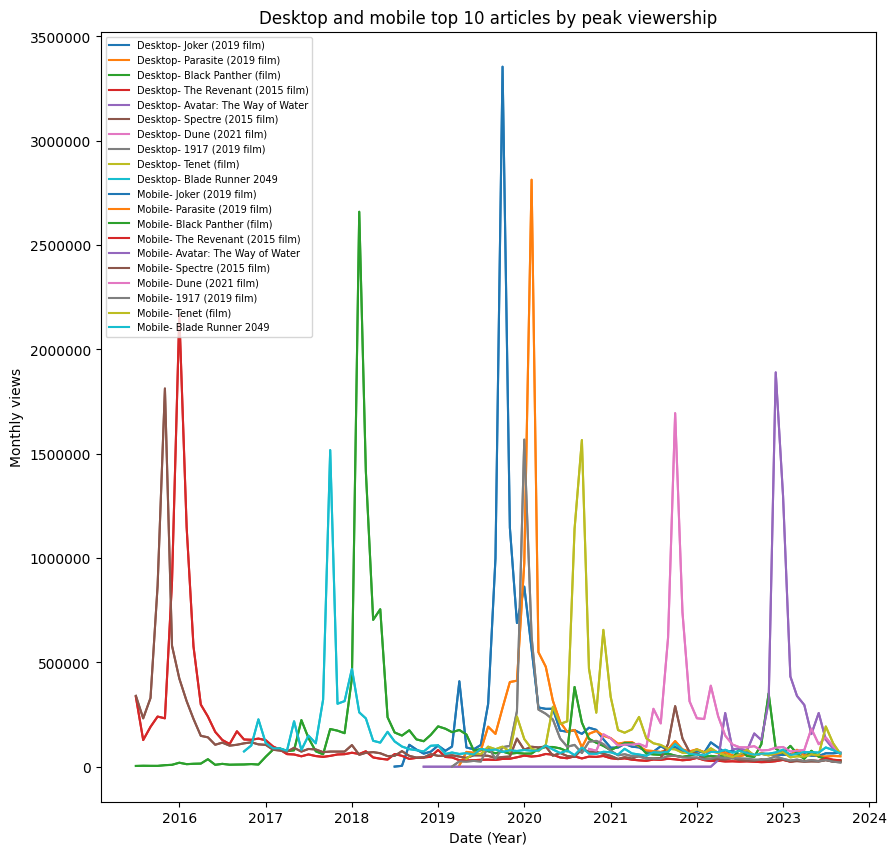

In [147]:
#Get highest and lowest desktop peak months
peak_desktop_viewship = {}
for article in data_desktop:
    name = article[0]
    totalviewship = 0
    months = []
    values = []
    peakviewship = 0
    for x in article[1]["Views"]:
        months.append(x)
        values.append(article[1]["Views"][x])
        if(article[1]["Views"][x] > peakviewship):
            peakviewship = article[1]["Views"][x]
        totalviewship += article[1]["Views"][x]
    averageviewship = totalviewship / len(article[1]["Views"])
    
    peak_desktop_viewship[name] = {
        "averageviewship": averageviewship,
        "months": months,
        "values": values,
        "peakviewship": peakviewship
    }

#Sort on averageviewship
peak_desktop_viewship = sorted(peak_desktop_viewship.items(), key=lambda x:x[1]['peakviewship'], reverse=True)

#######################################################################################################
#Get highest and lowest mobile peak months
peak_mobile_viewship = {}
for article in data_desktop:
    name = article[0]
    totalviewship = 0
    months = []
    values = []
    peakviewship = 0
    for x in article[1]["Views"]:
        months.append(x)
        values.append(article[1]["Views"][x])
        if(article[1]["Views"][x] > peakviewship):
            peakviewship = article[1]["Views"][x]
        totalviewship += article[1]["Views"][x]
    averageviewship = totalviewship / len(article[1]["Views"])
    
    peak_mobile_viewship[name] = {
        "averageviewship": averageviewship,
        "months": months,
        "values": values,
        "peakviewship": peakviewship
    }

#Sort on averageviewship
peak_mobile_viewship = sorted(peak_mobile_viewship.items(), key=lambda x:x[1]['peakviewship'], reverse=True)

#######################################################################################################
#######################################################################################################
#Graph top 10 for both mobile and desktop
fig, ax = plt.subplots(figsize=(10,10))

#Desktop
for i in range(10):
    x = [datetime.strptime(d, '%Y%m%d%H') for d in peak_desktop_viewship[i][1]['months']]
    y = peak_desktop_viewship[i][1]['values']
    ax.plot(x, y, label=str("Desktop- " + peak_desktop_viewship[i][0]))

#Mobile
for i in range(10):
    x = [datetime.strptime(d, '%Y%m%d%H') for d in peak_mobile_viewship[i][1]['months']]
    y = peak_mobile_viewship[i][1]['values']
    ax.plot(x, y, label=str("Mobile- " + peak_mobile_viewship[i][0]))
plt.title('Desktop and mobile top 10 articles by peak viewership')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_xlabel('Date (Year)')
ax.set_ylabel('Monthly views')
ax.legend(loc=2,prop={'size': 7})

# Visualization 3: ...
Fewest Months of Data - The third graph should show pages that have the fewest months of available data. These will all be relatively short time series and should contain a set of the most recent academy award winners. Your graph should show the 10 articles with the fewest months of data for desktop access and the 10 articles with the fewest months of data for mobile access.

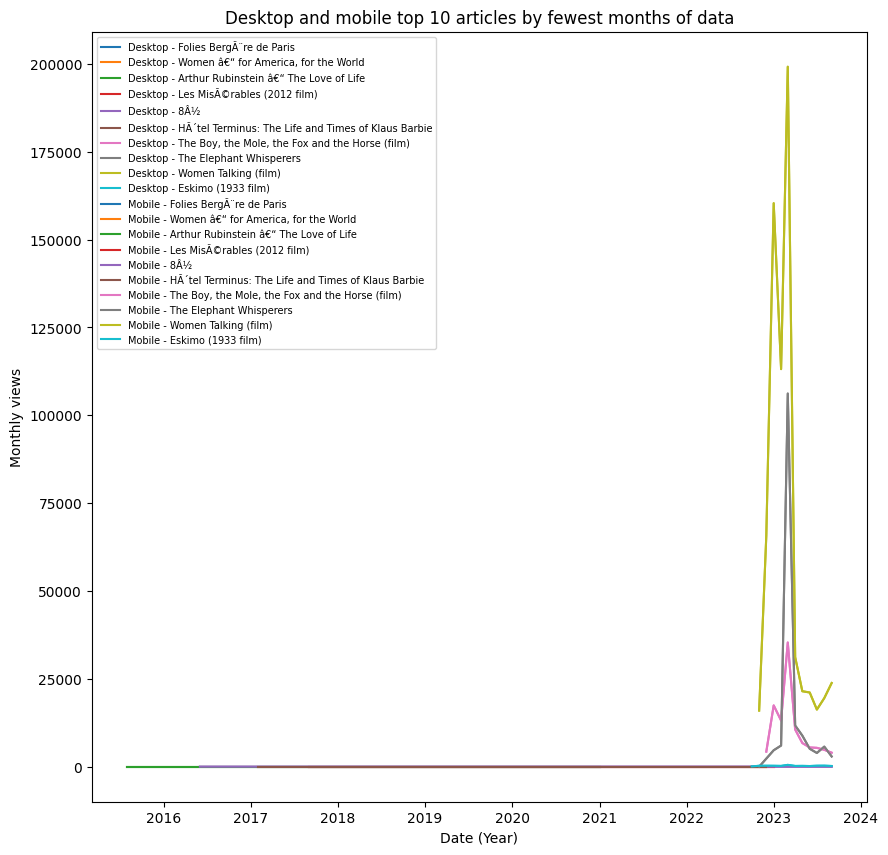

In [153]:
#Get number of months per article
number_months_desktop_viewship = {}
for article in data_desktop:
    name = article[0]
    totalviewship = 0
    months = []
    values = []
    peakviewship = 0
    for x in article[1]["Views"]:
        months.append(x)
        values.append(article[1]["Views"][x])
        if(article[1]["Views"][x] > peakviewship):
            peakviewship = article[1]["Views"][x]
        totalviewship += article[1]["Views"][x]
    averageviewship = totalviewship / len(article[1]["Views"])
    
    number_months_desktop_viewship[name] = {
        "averageviewship": averageviewship,
        "months": months,
        "values": values,
        "numMonths": len(months)
    }

#Sort on averageviewship
number_months_desktop_viewship = sorted(number_months_desktop_viewship.items(), key=lambda x:x[1]['numMonths'], reverse=False)

#######################################################################################################
#Get number of months per article
number_months_mobile_viewship = {}
for article in data_desktop:
    name = article[0]
    totalviewship = 0
    months = []
    values = []
    peakviewship = 0
    for x in article[1]["Views"]:
        months.append(x)
        values.append(article[1]["Views"][x])
        if(article[1]["Views"][x] > peakviewship):
            peakviewship = article[1]["Views"][x]
        totalviewship += article[1]["Views"][x]
    averageviewship = totalviewship / len(article[1]["Views"])
    
    number_months_mobile_viewship[name] = {
        "averageviewship": averageviewship,
        "months": months,
        "values": values,
        "numMonths": len(months)
    }

#Sort on averageviewship
number_months_mobile_viewship = sorted(number_months_mobile_viewship.items(), key=lambda x:x[1]['numMonths'], reverse=False)

#######################################################################################################
#######################################################################################################
#Graph top 10 for both mobile and desktop
fig, ax = plt.subplots(figsize=(10,10))

#Desktop
for i in range(10):
    x = [datetime.strptime(d, '%Y%m%d%H') for d in number_months_desktop_viewship[i][1]['months']]
    y = number_months_desktop_viewship[i][1]['values']
    ax.plot(x, y, label=str("Desktop - " + number_months_desktop_viewship[i][0]))

#Mobile
for i in range(10):
    x = [datetime.strptime(d, '%Y%m%d%H') for d in number_months_mobile_viewship[i][1]['months']]
    y = number_months_mobile_viewship[i][1]['values']
    ax.plot(x, y, label=str("Mobile - " + number_months_mobile_viewship[i][0]))
plt.title('Desktop and mobile top 10 articles by fewest months of data')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_xlabel('Date (Year)')
ax.set_ylabel('Monthly views')
ax.legend(loc=2,prop={'size': 7})